# One particle motion

Use the same inputs but lets look at the particle motion

In [17]:
# Import and define constantes
import numpy as np
import matplotlib.pyplot as plt
import random
from  scipy import ndimage

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

me = 9.109e-31; #[kg] electron mass
q = 1.6021765650e-19; #[C] electron charge
kb = 1.3806488e-23;  #Blozman constant
eps_0 = 8.8548782e-12; #Vaccum permitivitty

In [18]:
#define the maxwellian function
def velocity_maxw():
    import random
    v_Te = np.sqrt(q*Te/me)

    W = 2
    while (W >= 1 or W <= 0):
        R1 = (random.random()*2 -1 )
        R2 = (random.random()*2 -1 )
        
        W = R1**2 + R2**2
    W = np.sqrt( (-2*np.log(W))/W)
        
    v = v_Te*R1*W
    return v

def pusher(i,Vdrift):
    
    vz = tabe_vz[i]
    vy = tabe_vy[i]
    vx = tabe_vx[i]

    vz = vz - q/me*dT*Ez
    vx = vx - q/me*dT*Ex
    vy = vy - q/me*dT*Ey

    vz = vz - B0*vy
    vy = vy + B0*vz

    #vz = vz*np.cos(B0) - vy*np.sin(B0)
    #vy = vz*np.sin(B0) + vy*np.cos(B0)

    tabe_vz[i] = vz
    tabe_vy[i] = vy

    tabe_z[i] = tabe_z[i] + (Vdrift + tabe_vz[i]) *dT
    tabe_y[i] = tabe_y[i] + ( tabe_vy[i]) *dT


In [19]:
Lx = 0.02      #[m]
Nx = 100       #number of cells
Te = 10;     #[eV] Electron distribution temperature

Ex, Ey, Ez = 0, 0, 0        #[V/m]
dT = 0.8e-11    #[s]
B0 = 10e-2*q/me*dT   #[T] then factor param for Boris scheme
dX = 1e-5
Np = 5;  #Number of particle to create

vd = 100000  # [m/s]


In [35]:
tabe_vx = np.zeros(Np)
tabe_vz = np.zeros(Np)
tabe_vy = np.zeros(Np)

tabe_z = np.zeros(Np)
tabe_y = np.zeros(Np)

#init velocitises
for i in np.arange(Np):
    tabe_vx[i] = velocity_maxw()
    tabe_vy[i] = velocity_maxw()
    tabe_vz[i] = velocity_maxw()

#calculate positions
for i in np.arange(Np):
    R = random.random()
    R *= Lx
    tabe_z[i] = R

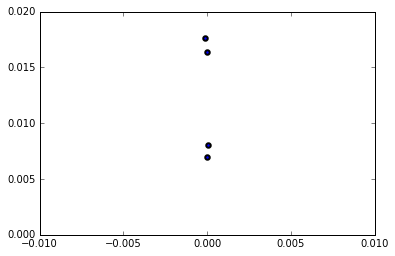

In [61]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -Lx/2, Lx/2))
ax.set_ylim((0, Lx))

pathcol = plt.scatter([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    pathcol.set_offsets([[], []])
    return [pathcol]

# animation function. This is called sequentially
def animate(i):
    
    for i in np.arange(Np):

        pusher(i,Vdrift = vd)
    
    p = np.zeros((Np,2))
    for i in np.arange(Np):
        p[i,0] = tabe_y[i]
        p[i,1] = tabe_z[i]

    pathcol.set_offsets(p)
    return [pathcol]

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1500, interval=20, blit=True)

HTML(anim.to_html5_video())

In [ ]:
Nt = 10
dT = 5e-11#[s]
B0 = 5e-2*q/me*dT   #[T]
for y in np.arange(Nt):
    if y%100 == 0:
        print("step ",y, " over ",Nt)
    for i in np.arange(Np):
        
        vz = tabe_vz[i]
        vy = tabe_vy[i]

        vz = vz - q/me*dT*E0
        vz = vz + B0*vy
        vy = vy - B0*vz
        
        #vz = vz*np.cos(B0) - vy*np.sin(B0)
        #vy = vz*np.sin(B0) + vy*np.cos(B0)

        tabe_vz[i] = vz
        tabe_vy[i] = vy

        tabe_z[i] = tabe_z[i] + (vd + tabe_vz[i]) *dT
    print(tabe_vz[1],tabe_vy[1])
    plt.scatter(tabe_vz[1],tabe_vy[1])
plt.show()

In [63]:
(3/2)/2

0.75